# Explore Business.csv and merge business.csv and review.csv

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import dask.dataframe as dd
from collections import defaultdict

# Exploring data in business.csv file

In [112]:
parent_dir = 'D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/'

path_dic = {
            'B': parent_dir+'B.csv',
            'R':parent_dir+'R1.csv',
            'U':parent_dir+'U.csv'
           }
#Read B.csv file
business_data = pd.read_csv(path_dic['B']).drop('Unnamed: 0', 1)

In [91]:
#Examine the states with most number of business
business_data['state'].value_counts()

MA     36012
OR     25175
TX     24485
FL     21907
GA     18090
BC     17298
OH     11258
CO      3198
WA      3121
CA        13
NH         4
AZ         2
ON         2
NY         2
VA         2
AL         1
ABE        1
IL         1
DE         1
WI         1
KS         1
NM         1
HI         1
KY         1
DC         1
OK         1
MN         1
WY         1
MI         1
NC         1
ME         1
Name: state, dtype: int64

In [92]:
# 0.9997 of all business are in states: ['OR', 'MA', 'TX', 'FL', 'GA', 'BC', 'OH', 'CO', 'WA']
# therefore throw out all the other states!

len(business_data[business_data['state'].isin(['OR', 'MA', 'TX', 'FL', 'GA', 'BC', 'OH', 'CO', 'WA'])]) / len(business_data)
business_data = business_data[business_data['state'].isin(['OR', 'MA', 'TX', 'FL', 'GA', 'BC', 'OH', 'CO', 'WA'])]
business_data.to_csv(parent_dir+'business_s.csv')

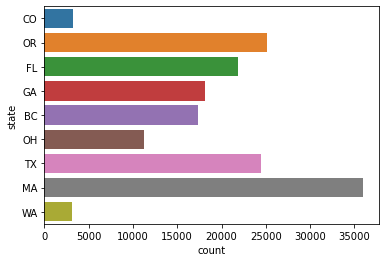

In [94]:
# looking at state dist.
sns.countplot(data = business_data[business_data['state'].isin(['OR', 'MA', 'TX', 'FL', 'GA', 'BC', 'OH', 'CO', 'WA'])], y = 'state')
plt.show()


# Merge Review and business data

In [128]:
#Read review.csv
review_data = pd.read_csv(path_dic['R']+'/0.part')

In [129]:
#Check the business ID
review_data['business_id']

0          xGXzsc-hzam-VArK6eTvtw
1          KXCXaF5qimmtKKqnPc_LQA
2          vRrDTIW9IFBO4cc3laazUw
3          VPqWLp9kMiZEbctCebIZUA
4          9P-lp3AWDXGayDqJz9VPwQ
                    ...          
2771184    yyTtwwQ4JnQMJ2rn3W0S0g
2771185    RDgwjgbu5xziFIAaNn3WCQ
2771186    rbuj2X4SXIc3MDul4dcxIA
2771187    IRzjEZ2pX4iOpnBG7oZJ7g
2771188    pxwYIa1jZzHJ4R0Sp1cHFw
Name: business_id, Length: 2771189, dtype: object

In [131]:
#Merge business and review csv
merged = review_data.merge(business_data, on = 'business_id', how = 'inner')

In [132]:
#Check the length of merged dataset
len(merged.drop_duplicates(subset = 'name'))

100610